<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW3/Full_Solution_All_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 - Feature Extraction with Data Augmentation

**Download the data**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-20 00:18:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  68.8MB/s    in 1.0s    

2019-04-20 00:18:58 (68.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

**VGG19**

In [4]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____

**Freezing conv base**

In [0]:
conv_base.trainable = False

**Join VGG19 with Dense layers**

In [6]:
from keras import layers
from keras import models
from keras import optimizers

m = conv_base.output
m=layers.Flatten()(m)
m=layers.Dense(256, activation='relu')(m)

m = layers.Dense(1, activation='sigmoid')(m)
model = models.Model(inputs=[conv_base.input], outputs=[m])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

**Dense layer training**

In [0]:
for idx,layer in enumerate(model.layers):
  layer.trainable = idx >= 22 

**Data augmentation**

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Training the model**

In [9]:
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])


history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 24s 237ms/step - loss: 0.6010 - acc: 0.6820 - val_loss: 0.4985 - val_acc: 0.7900
Epoch 2/30
100/100 [==============================] - 19s 186ms/step - loss: 0.5073 - acc: 0.7700 - val_loss: 0.4249 - val_acc: 0.8270
Epoch 3/30
100/100 [==============================] - 18s 182ms/step - loss: 0.4608 - acc: 0.7925 - val_loss: 0.3724 - val_acc: 0.8420
Epoch 4/30
100/100 [==============================] - 18s 183ms/step - loss: 0.4333 - acc: 0.8065 - val_loss: 0.3497 - val_acc: 0.8510
Epoch 5/30
100/100 [==============================] - 19s 189ms/step - loss: 0.4124 - acc: 0.8150 - val_loss: 0.3392 - val_acc: 0.8600
Epoch 6/30
100/100 [==============================] - 18s 181ms/step - loss: 0.3858 - acc: 0.8310 - val_loss: 0.3237 - val_acc: 0.8560
Epoch 7/30
100/100 [==============================] - 19s 185ms/step - loss: 0.3787 - acc: 0.8350 - val_loss: 0.3124 - val_acc: 0.8780
Epoch 8

**Accuracy and loss - Training and Validation data**

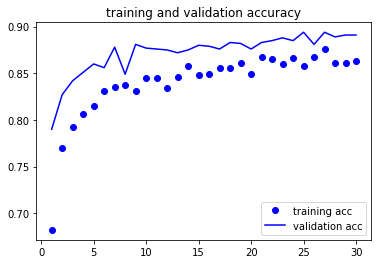

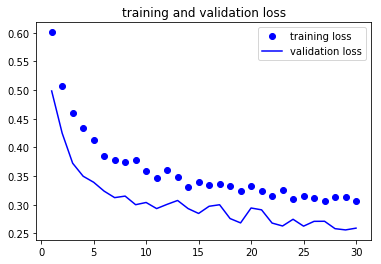

Validation loss: 0.24506401106715203
Validation accuracy: 0.8979999983310699


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

**Saving the model**

In [0]:
model_fname = 'cats_and_dogs_model_1.h5' 
model.save(model_fname)

In [0]:
from google.colab import files

with open(model_fname, 'r') as f:
  files.download(model_fname)

# Problem 2 - Fine Tuning with Data Augmentation

**Loading Problem 1 model**

In [14]:
from keras.models import load_model  
    
model2 = load_model(model_fname)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

**Setting Fine Tuning for last conv_base layer and fully connected layers**

In [0]:
#last conv and fully connected after 20th layer
for idx,layer in enumerate(model2.layers):
  layer.trainable = idx >= 20
  #total 25 layers

In [20]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


**Fine tuning the model**

In [21]:
model2.compile(
  loss='binary_crossentropy', 
  optimizer=optimizers.RMSprop(lr=1e-5), 
  metrics=['acc'])

history = model2.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=30
)

Epoch 1/30
100/100 [==============================] - 19s 191ms/step - loss: 0.3129 - acc: 0.8620 - val_loss: 0.2631 - val_acc: 0.8967
Epoch 2/30
100/100 [==============================] - 18s 180ms/step - loss: 0.2856 - acc: 0.8755 - val_loss: 0.2789 - val_acc: 0.8850
Epoch 3/30
100/100 [==============================] - 17s 167ms/step - loss: 0.2881 - acc: 0.8790 - val_loss: 0.2284 - val_acc: 0.9017
Epoch 4/30
100/100 [==============================] - 17s 169ms/step - loss: 0.2798 - acc: 0.8800 - val_loss: 0.2848 - val_acc: 0.8817
Epoch 5/30
100/100 [==============================] - 17s 169ms/step - loss: 0.2754 - acc: 0.8785 - val_loss: 0.2487 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 18s 179ms/step - loss: 0.2771 - acc: 0.8905 - val_loss: 0.2537 - val_acc: 0.8967
Epoch 7/30
100/100 [==============================] - 17s 168ms/step - loss: 0.2655 - acc: 0.8830 - val_loss: 0.2321 - val_acc: 0.8967
Epoch 8/30
100/100 [==============================] - 1

**Accuracy and loss of fine tuned model**

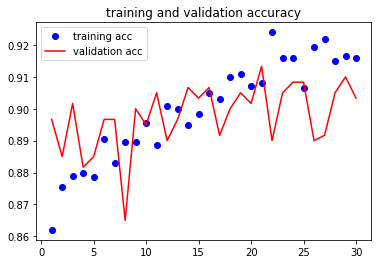

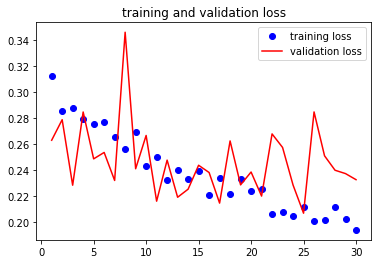

Validation loss: 0.2273403466306627
Validation accuracy: 0.9159999966621399


In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

val_loss, val_acc = model2.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)


**Saving and downloading the model**

In [0]:
model_fname_2 = 'cats_and_dogs_model_2.h5' 
model2.save(model_fname_2)

with open(model_fname_2, 'r') as f:
  files.download(model_fname_2)

# Problem 3

**Visualize heatmaps from problem 2 model**

In [71]:
model3 = load_model('cats_and_dogs_model_2.h5')
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
images, labels = next(validation_generator)

**Using Block5_conv3 to compute gradient**

In [0]:
from keras import backend as K
import numpy as np
import cv2

last_conv_layer = model3.get_layer('block5_conv3') 

def process_image(img):
    
    grads = K.gradients(model3.output[0], last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model3.input], [pooled_grads, last_conv_layer.output[0], model3.output[0]])
    
    x = np.expand_dims(img, axis=0)
    pooled_grads_value, conv_layer_output_value, pred_value = iterate([x])
    
    if pred_value[0] < 1.0:
      if pred_value[0] < 0.5:
          conv_layer_output_value = 1-conv_layer_output_value 
      for i in range(512):
          conv_layer_output_value[:, :, i] *= (pooled_grads_value[i])

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    # normalize
    heatmap = (heatmap - heatmap.min())/(heatmap.max()-heatmap.min())

    heatmap_adj = cv2.resize(1-heatmap, (img.shape[1], img.shape[0]))
    heatmap_adj = np.uint8(255 * heatmap_adj)
    heatmap_adj = cv2.applyColorMap(heatmap_adj, cv2.COLORMAP_JET)
    
    superimposed_img = np.uint8(heatmap_adj * 0.4 + np.uint8(255 * img) * 0.6)
    
    return superimposed_img, pred_value[0], heatmap_adj

**Heatmaps**

ValueError: ignored

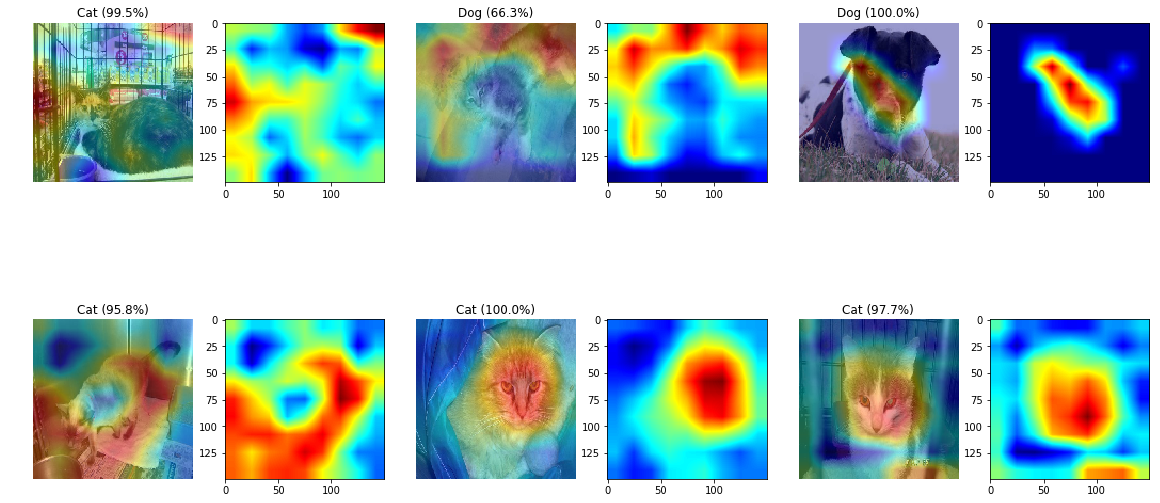

In [74]:
fig = plt.figure(figsize=(20, 10))
j=1
for i,img in enumerate(images[:10,]):
  superimposed_img, pred, heatmap = process_image(img)
  plt.subplot(2, 6, j)
  plt.imshow(superimposed_img)

  if pred < 0.5:
      class_name = "Cat"
      pred = 1-pred
  else:
    class_name = "Dog"

  plt.title("{} ({:.1f}%)".format(class_name, pred*100))
  plt.axis('off')

  plt.subplot(2, 6, j+1)
  plt.imshow(heatmap)

  j=j+2;
plt.show()

**Using pretrained weights from VGG19 to visualize heatmaps**

**Include densely connected classifier on top**

In [0]:
from keras.applications import VGG19

model_w = VGG19(weights='imagenet')

**Output feature map of the block5_conv4**

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions

last_conv_layer = model_w.get_layer('block5_conv4')

In [90]:
!wget https://i.ibb.co/ZcGL8xt/IMG-0558.jpg -O bean_maltese.jpg

!wget https://i.ibb.co/CnqLw7V/mmica.png -O mica_cat.jpg
  
!wget https://i.ytimg.com/vi/0BZ_s-Lix20/hqdefault.jpg -O cat_box.jpg
  
!wget https://i.pinimg.com/originals/02/75/bf/0275bf8ca9e496b8b471a5cc2d7c69ed.jpg -O dog_smiling.jpg
  
!wget https://www.suggestedpost.eu/wp-content/uploads/2018/08/atchoum-cat-or-dog-4.jpg -O cat_or_dog.jpg
  
img_path1 = 'bean_maltese.jpg'
img_path2 = 'mica_cat.jpg'
img_path3 = 'cat_box.jpg'
img_path4 = 'dog_smiling.jpg'
img_path5 = 'cat_or_dog.jpg'

--2019-04-20 01:43:59--  https://i.ibb.co/ZcGL8xt/IMG-0558.jpg
Resolving i.ibb.co (i.ibb.co)... 64.31.6.154
Connecting to i.ibb.co (i.ibb.co)|64.31.6.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98313 (96K) [image/jpeg]
Saving to: ‘bean_maltese.jpg’

bean_maltese.jpg    100%[===================>]  96.01K  --.-KB/s    in 0.06s   

2019-04-20 01:43:59 (1.53 MB/s) - ‘bean_maltese.jpg’ saved [98313/98313]

--2019-04-20 01:44:00--  https://i.ibb.co/CnqLw7V/mmica.png
Resolving i.ibb.co (i.ibb.co)... 64.31.6.154
Connecting to i.ibb.co (i.ibb.co)|64.31.6.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441660 (431K) [image/png]
Saving to: ‘mica_cat.jpg’

mica_cat.jpg        100%[===================>] 431.31K  --.-KB/s    in 0.1s    

2019-04-20 01:44:00 (3.44 MB/s) - ‘mica_cat.jpg’ saved [441660/441660]

--2019-04-20 01:44:01--  https://i.ytimg.com/vi/0BZ_s-Lix20/hqdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 74.125.142.119, 7

**Preprocesing and visualization**

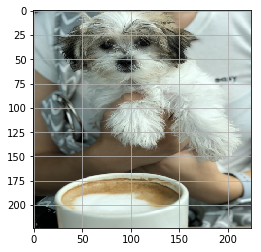

Predicted: [('n02098413', 'Lhasa', 0.3889046), ('n02086240', 'Shih-Tzu', 0.32265377), ('n02085936', 'Maltese_dog', 0.036830317), ('n02110627', 'affenpinscher', 0.03487826), ('n02086079', 'Pekinese', 0.032794353)]


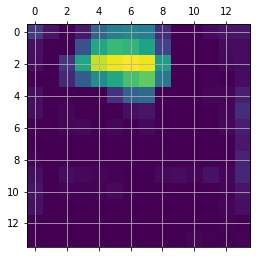

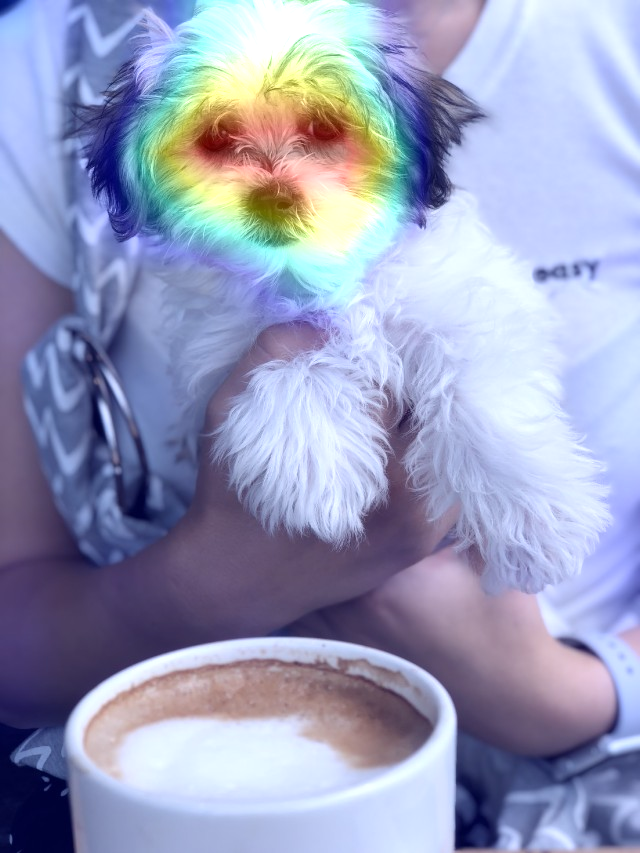

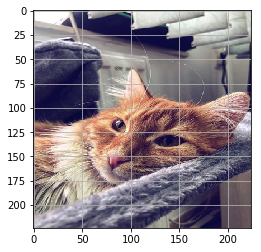

Predicted: [('n02808304', 'bath_towel', 0.35096452), ('n02123159', 'tiger_cat', 0.16749705), ('n02123045', 'tabby', 0.09153239), ('n02124075', 'Egyptian_cat', 0.033470012), ('n02123394', 'Persian_cat', 0.029156407)]


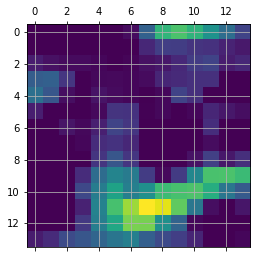

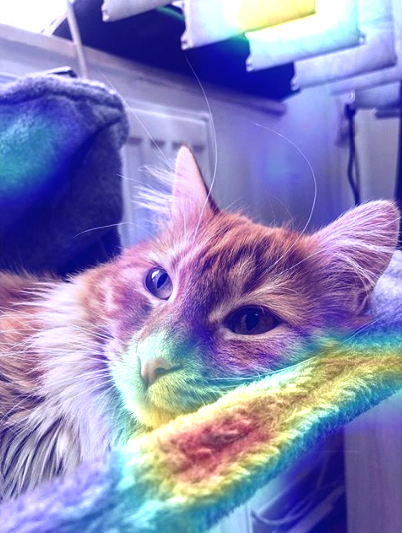

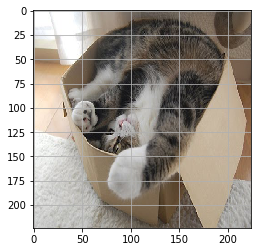

Predicted: [('n03887697', 'paper_towel', 0.28065944), ('n02123045', 'tabby', 0.18750301), ('n15075141', 'toilet_tissue', 0.1473055), ('n02123159', 'tiger_cat', 0.07507875), ('n02124075', 'Egyptian_cat', 0.053596828)]


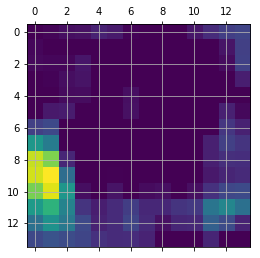

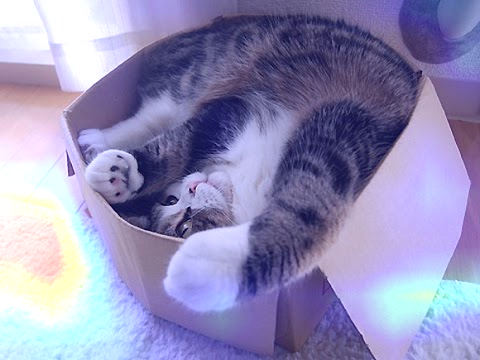

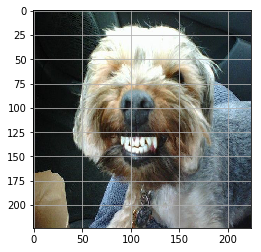

Predicted: [('n02091635', 'otterhound', 0.43247867), ('n02113712', 'miniature_poodle', 0.081843324), ('n02095570', 'Lakeland_terrier', 0.051390078), ('n02097474', 'Tibetan_terrier', 0.051370967), ('n02094114', 'Norfolk_terrier', 0.04171339)]


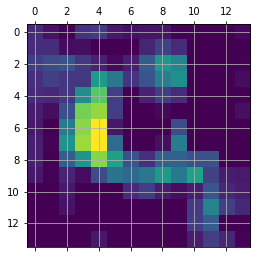

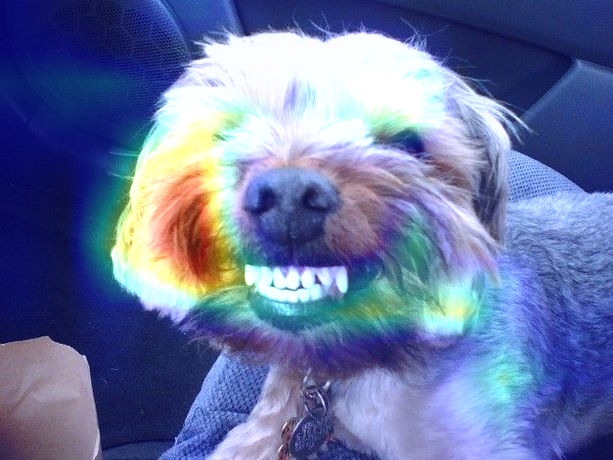

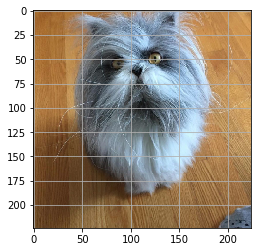

Predicted: [('n02123394', 'Persian_cat', 0.99641377), ('n02328150', 'Angora', 0.0030324515), ('n02086240', 'Shih-Tzu', 0.00016729634), ('n02098413', 'Lhasa', 0.00011226284), ('n02086079', 'Pekinese', 0.000111268164)]


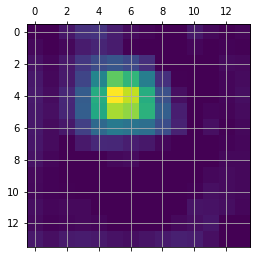

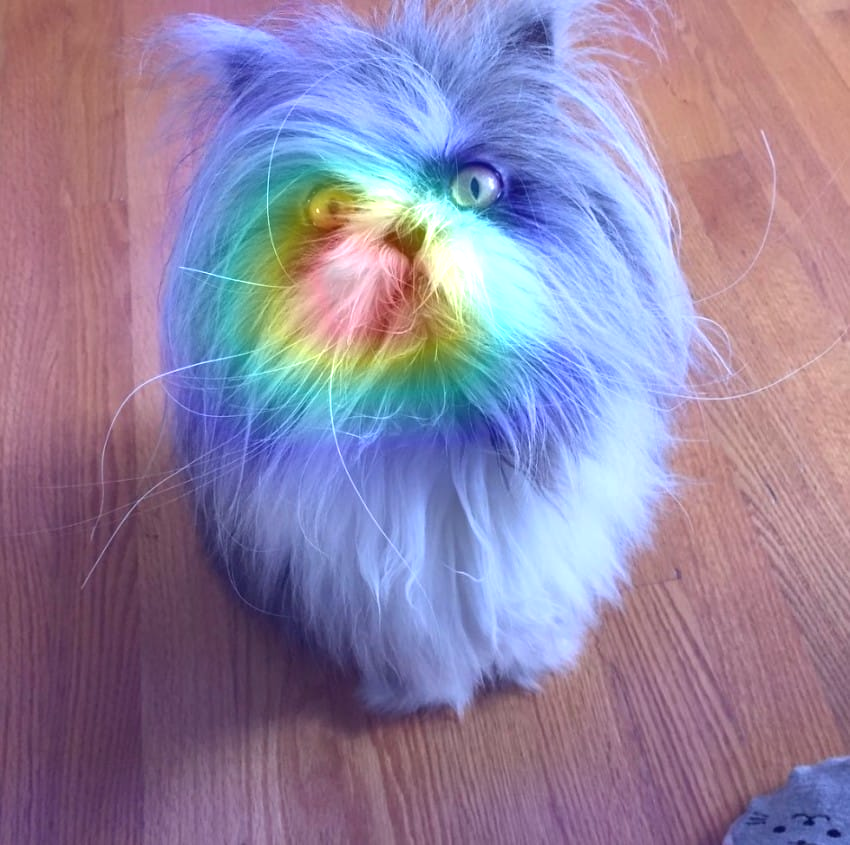

In [91]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K

def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.4 + img
  cv2_imshow(superimposed_img)
  
def process_image(img_path, idx=0):
  
  img = image.load_img(img_path, target_size=(224, 224))
  
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model_w.predict(x)
  print('Predicted:', decode_predictions(preds, top=5)[0])
  
  class_index = np.argsort(preds[0])[-(1+idx)]
  class_output = model_w.output[:, class_index]
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model_w.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  
  show_superimposed_image(img_path, heatmap)

process_image(img_path1)
process_image(img_path2)
process_image(img_path3)
process_image(img_path4)
process_image(img_path5)

# Problem 4 - tSNE visualization

**Loading model from problem 2**

In [102]:
from keras import models
from keras.models import load_model

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

model4 = load_model('cats_and_dogs_model_2.h5')
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

**Observing high level activation**

In [0]:
layer = model4.get_layer('dense_1') 
layer_output = layer.output

activation_model = models.Model(inputs=model4.input, outputs=[layer_output])

**Preprocessing the image**

In [104]:

from keras.preprocessing.image import ImageDataGenerator

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=500,
    class_mode='binary')

images, labels = next(validation_generator)
print(images.shape)
print(labels.shape)

Found 1000 images belonging to 2 classes.
(500, 150, 150, 3)
(500,)


In [0]:
activations = activation_model.predict(images)

**Data_scatter fuction**

In [0]:
def data_scatter(vecs, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=16)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

**tSNE visualization**

In [107]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

catsvsdogs_tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 3.013164758682251 seconds


['Cute Cats', 'Awesome Dogs']


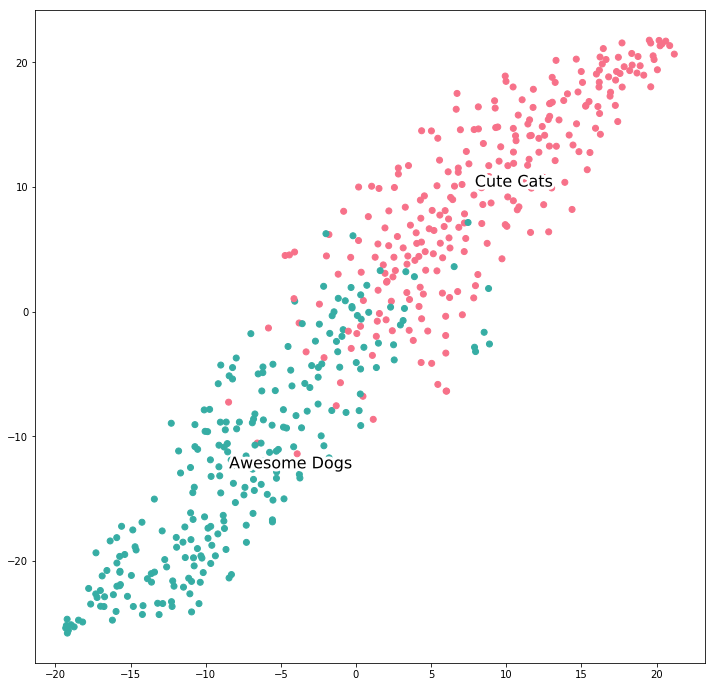

In [108]:
class_names = ["Cute Cats", "Awesome Dogs"]
print(class_names)

data_scatter(catsvsdogs_tsne, labels)